Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
eastwest=pd.read_csv("/content/EastWestAirlines1.csv")

In [33]:
eastwest

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
eastwest1=eastwest.drop(["ID#"],axis=1)

In [37]:
eastwest1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [38]:
# Normalisation Function       ( Its up to us if you want to use normalise or standard scaler)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_east=scaler.fit_transform(eastwest1)

In [39]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [65]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaler_east)
  wcss.append(kmeans.inertia_)


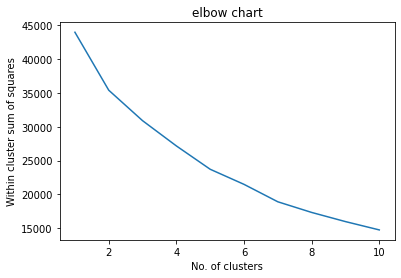

In [66]:
  plt.plot(range(1,11),wcss)
  plt.title("elbow chart")
  plt.xlabel("No. of clusters")
  plt.ylabel("Within cluster sum of squares")
  plt.show()

In [67]:
# Build cluster Algorithm
cluster_new=KMeans(n_clusters=4,random_state=30)
cluster_new.fit(scaler_east)    # Always fit to the normalised data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [68]:
cluster_new.labels_    # This will show clusters created

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [69]:
cluster_new.cluster_centers_    # This will show clusters centers created

array([[ 4.21746010e-01, -1.01103166e-02,  1.18776700e+00,
        -8.23786348e-02, -5.47688882e-02,  9.02825341e-01,
         7.41241194e-01, -9.45981390e-02, -1.04678145e-01,
         3.69614002e-01,  5.61908485e-01],
       [ 1.19930860e+00,  1.02758112e+00,  1.04575116e-01,
         1.38046790e-01, -6.27665798e-02,  6.25951749e-01,
         1.56054548e+00,  3.42709017e+00,  3.68477621e+00,
         2.85274660e-01,  9.18646074e-01],
       [-2.98748917e-01, -6.42142013e-02, -6.14321497e-01,
         3.28947498e-02, -6.07426678e-02, -5.18324114e-01,
        -4.91372184e-01, -1.85214810e-01, -1.97781208e-01,
        -2.07878651e-01, -3.48824498e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [70]:
# Assign created clusters to the dataset
eastwest1["clusterid"]=cluster_new.labels_   # use the labels one

In [71]:
eastwest1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [72]:
eastwest1.groupby(["clusterid"]).agg(["mean"]).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116091.697656,136.400000,3.695312,1.002344,1.001562,38957.671875,18.723437,327.871094,0.977344,4883.627344,0.642188
1,1,194447.337209,939.017442,2.203488,1.034884,1.000000,32260.296512,26.587209,5258.098837,15.348837,4707.616279,0.813953
2,2,43530.202607,94.403239,1.214455,1.019352,1.000395,4636.149684,6.886256,200.669431,0.623223,3688.845972,0.201817
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


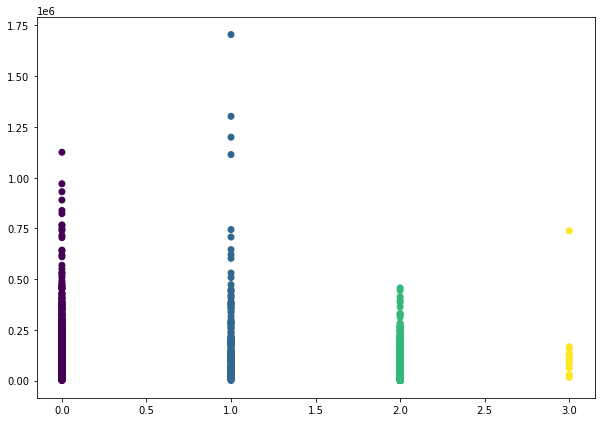

In [75]:
# Plot the clusters
plt.figure(figsize=(10,7))
plt.scatter(eastwest1["clusterid"],eastwest1["Balance"],c=cluster_new.labels_)